OUTLINE

- exporatory analysis
- identify "the question"
- hypothesis testing (eg chance white officer vs black officer arrets, escalates)
- maybe: machine learning model (features most resulting in escalation from 20 worst officers)


notes for Jeff 8/14:
- many columns with small number of Y/N, rest missing: for categorical, make category for missing
- there is an outcome column (arrest, citation, etc.)
- possible thoughts: outcome by "assigned by" (aka who called it in); outcome by race, gang affiliation, etc (getting at bias); other description column has great notes, but that would be very manual regex
- predict race or outcome (officer?) based on text fields

CONTACT_TYPE_DESCR is either IS or loitering; NLP based on other description field


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)

In [2]:
data = pd.read_csv('ISR-1-Jan-2018--31-Dec-2019-Juv-Redacted 2.csv',low_memory=False)
data.head()

,CONTACT_CARD_ID,CONTACT_TYPE_CD,CARD_NO,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,CLOTHING_DESCR,NAME_VERIFIED_I,RD_NO,HOTSPOT_NO,EVENT_NO,MISSION_NO,CPD_UNIT_NO,CREATED_BY,CREATED_DATE,MODIFIED_BY,MODIFIED_DATE,AGE,AGE_TO,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_NO,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD,ZIP_CD,DISTRICT,SECTOR,BEAT,AREA,WARD,RES_DISTRICT,RES_SECTOR,RES_BEAT,RES_AREA,RES_WARD,BUS_DISTRICT,BUS_SECTOR,BUS_BEAT,BUS_AREA,BUS_WARD,SUBMITTING_UNIT,CONTACT_TYPE_DESCR,V_YEAR,MAKE_CD,MAKE_DESCR,STYLE_CD,STYLE_DESCR,TYPE_CD,MODEL_DESCR,COLOR_TOP,COLOR_BOTTOM,FO_EMPLOYEE_ID,SO_EMPLOYEE_ID,SUPV_EMPLOYEE_ID,GANG,KNOWN_HANGOUT,FACTION_NAME,CONTACT_CARD_STATUS_CD,COMPLETION_I,LOCATION_CD,HANDCUFFED_I,VEHICLE_INVOLVED_I,DISPERSAL_TIME,NUMBER_OF_PERSONS_DISPERSED,GANG_LOOKOUT_I,GANG_SECURITY_I,INTIMIDATION_I,SUSPECT_NARCOTIC_ACTIVITY_I,ENFORCEMENT_ACTION_TAKEN_I,INDICATIVE_DRUG_TRANSACTION_I,INDICATIVE_CASING_I,FITS_DESCRIPTION_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,GANG_NARCOTIC_RELATED_I,OTHER_FACTOR_I,PAT_DOWN_I,PAT_DOWN_CONSENT_I,PAT_DOWN_RECEIPT_GIVEN_I,VERBAL_THREATS_I,KNOWLEDGE_OF_PRIOR_I,ACTIONS_INDICATIVE_VIOLENCE_I,VIOLENT_CRIME_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,WEAPON_OR_CONTRABAND_FOUND_I,FIREARM_I,COCAINE_I,COCAINE_AMOUNT,HEROIN_I,HEROIN_AMOUNT,OTHER_CONTRABAND_I,OTHER_CONTRABAND_DESCR,OTHER_WEAPON_I,OTHER_WEAPON_DESCR,CANNABIS_I,CANNABIS_AMOUNT,OTHER_CON_SUB_I,OTHER_CON_SUB,OTHER_CON_SUB_AMT,SEARCH_I,SEARCH_CONSENT_I,SEARCH_CONTRABAND_FOUND_I,SEARCH_FIREARM_I,SEARCH_COCAINE_I,SEARCH_COCAINE_AMOUNT,SEARCH_HEROIN_I,SEARCH_HEROIN_AMOUNT,SEARCH_OTHER_CONTRABAND_I,SEARCH_OTHER_CONTRABAND_DESCR,SEARCH_OTHER_WEAPON_I,SEARCH_OTHER_WEAPON_DESCR,SEARCH_CANNABIS_I,SEARCH_CANNABIS_AMOUNT,SEARCH_OTHER_CON_SUB_I,SEARCH_OTHER_CON_SUB_DESCR,SEARCH_OTHER_CON_SUB_AMT,EVENT_ASSIGNEED_BY_CD,BODY_CAMERA_I,CAR_CAMERA_I,VEHICLE_STOPPED_I,INFORMATION_REFUSED_I,FACIAL_HAIR_CD,GANG_OTHER_I,ENFORCEMENT_TYPE_CD,ENFORCEMENT_ID_NO,CITED_VIOLATIONS_CD,CANNABIS_INVENTORY_NO,COCAINE_INVENTORY_NO,HEROIN_INVENTORY_NO,OTHER_CON_SUB_INVENTORY_NO,FIREARM_INVENTORY_NO,OTHER_WEAPON_INVENTORY_NO,ALCOHOL_I,ALCOHOL_INVENTORY_NO,PARA_I,PARA_INVENTORY_NO,STOLEN_PROPERTY_I,STOLEN_PROPERTY_INVENTORY_NO,SEARCH_PROPERTY_I,S_CANNABIS_INVENTORY_NO,S_COCAINE_INVENTORY_NO,S_HEROIN_INVENTORY_NO,S_OTHER_CON_SUB_INVENTORY_NO,S_FIREARM_INVENTORY_NO,S_OTHER_WEAPON_INVENTORY_NO,S_ALCOHOL_I,S_ALCOHOL_INVENTORY_NO,S_PARA_I,S_PARA_INVENTORY_NO,S_STOLEN_PROPERTY_I,S_STOLEN_PROPERTY_INVENTORY_NO,GANG_OTHER,OTHER_DESCR,OTHER_INVENTORY_NO,S_OTHER_I,S_OTHER_DESCR,S_OTHER_INVENTORY_NO,NAME
0,20410357,INVSTG,ISR000410357,01-JAN-2018 00:08,0,2523,N,"BROWN JACKET, JEANS",NaN,JB100012,NaN,121,NaN,25,185285,01-JAN-2018 01:46,185285.0,01-JAN-2018 01:47,30.0,NaN,M,WWH,506,165,MED,BRO,BLK,SHORT,MED,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,25,252,2523,3,NaN,16.0,163.0,1634.0,3,NaN,NaN,NaN,NaN,0,NaN,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185285,845723.0,184324.0,UNKNOWN,NaN,NaN,APP,Y,303,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,NaN,17,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN
1,20410350,INVSTG,ISR000410350,01-JAN-2018 00:08,0,2523,N,BLUE JEANS AND A BLACK SWEATER,NaN,JB100012,NaN,121,NaN,25,675642,01-JAN-2018 01:35,675642.0,01-JAN-2018 01:38,20.0,NaN,M,WWH,510,175,MED,BRO,BLK,MED,LBR,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,25,252,2523,3,NaN,25.0,252.0,2523.0,3,NaN,NaN,NaN,NaN,0,NaN,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675642,845723.0,184324.0,NaN,NaN,NaN,APP,Y,289,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,N

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290145 entries, 0 to 290144
Columns: 169 entries, CONTACT_CARD_ID to NAME
dtypes: float64(45), int64(14), object(110)
memory usage: 374.1+ MB


In [4]:
# check to make sure that the unique identifier is FO_EMPLOYEE_ID, or First Officer Employee ID

data.FO_EMPLOYEE_ID.describe()

count    290145.000000
mean     496251.859605
std      284628.729892
min          67.000000
25%      251163.000000
50%      504556.000000
75%      737622.000000
max      999982.000000
Name: FO_EMPLOYEE_ID, dtype: float64

In [5]:
data['FO_EMPLOYEE_ID'].nunique()

7936

In [6]:
data.isnull().sum()

CONTACT_CARD_ID              0
CONTACT_TYPE_CD              0
CARD_NO                      0
CONTACT_DATE                 0
CONTACT_HOUR                 0
                         ...  
OTHER_INVENTORY_NO      290145
S_OTHER_I               289038
S_OTHER_DESCR           289162
S_OTHER_INVENTORY_NO    290145
NAME                    255739
Length: 169, dtype: int64

In [ ]:
# great, there are already some columns we can remove!

In [7]:
# first, we'll make a copy of the dataframe so the original remains unimpacted
df_copy = data.copy()

df_copy.head()

,CONTACT_CARD_ID,CONTACT_TYPE_CD,CARD_NO,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,CLOTHING_DESCR,NAME_VERIFIED_I,RD_NO,HOTSPOT_NO,EVENT_NO,MISSION_NO,CPD_UNIT_NO,CREATED_BY,CREATED_DATE,MODIFIED_BY,MODIFIED_DATE,AGE,AGE_TO,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_NO,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD,ZIP_CD,DISTRICT,SECTOR,BEAT,AREA,WARD,RES_DISTRICT,RES_SECTOR,RES_BEAT,RES_AREA,RES_WARD,BUS_DISTRICT,BUS_SECTOR,BUS_BEAT,BUS_AREA,BUS_WARD,SUBMITTING_UNIT,CONTACT_TYPE_DESCR,V_YEAR,MAKE_CD,MAKE_DESCR,STYLE_CD,STYLE_DESCR,TYPE_CD,MODEL_DESCR,COLOR_TOP,COLOR_BOTTOM,FO_EMPLOYEE_ID,SO_EMPLOYEE_ID,SUPV_EMPLOYEE_ID,GANG,KNOWN_HANGOUT,FACTION_NAME,CONTACT_CARD_STATUS_CD,COMPLETION_I,LOCATION_CD,HANDCUFFED_I,VEHICLE_INVOLVED_I,DISPERSAL_TIME,NUMBER_OF_PERSONS_DISPERSED,GANG_LOOKOUT_I,GANG_SECURITY_I,INTIMIDATION_I,SUSPECT_NARCOTIC_ACTIVITY_I,ENFORCEMENT_ACTION_TAKEN_I,INDICATIVE_DRUG_TRANSACTION_I,INDICATIVE_CASING_I,FITS_DESCRIPTION_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,GANG_NARCOTIC_RELATED_I,OTHER_FACTOR_I,PAT_DOWN_I,PAT_DOWN_CONSENT_I,PAT_DOWN_RECEIPT_GIVEN_I,VERBAL_THREATS_I,KNOWLEDGE_OF_PRIOR_I,ACTIONS_INDICATIVE_VIOLENCE_I,VIOLENT_CRIME_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,WEAPON_OR_CONTRABAND_FOUND_I,FIREARM_I,COCAINE_I,COCAINE_AMOUNT,HEROIN_I,HEROIN_AMOUNT,OTHER_CONTRABAND_I,OTHER_CONTRABAND_DESCR,OTHER_WEAPON_I,OTHER_WEAPON_DESCR,CANNABIS_I,CANNABIS_AMOUNT,OTHER_CON_SUB_I,OTHER_CON_SUB,OTHER_CON_SUB_AMT,SEARCH_I,SEARCH_CONSENT_I,SEARCH_CONTRABAND_FOUND_I,SEARCH_FIREARM_I,SEARCH_COCAINE_I,SEARCH_COCAINE_AMOUNT,SEARCH_HEROIN_I,SEARCH_HEROIN_AMOUNT,SEARCH_OTHER_CONTRABAND_I,SEARCH_OTHER_CONTRABAND_DESCR,SEARCH_OTHER_WEAPON_I,SEARCH_OTHER_WEAPON_DESCR,SEARCH_CANNABIS_I,SEARCH_CANNABIS_AMOUNT,SEARCH_OTHER_CON_SUB_I,SEARCH_OTHER_CON_SUB_DESCR,SEARCH_OTHER_CON_SUB_AMT,EVENT_ASSIGNEED_BY_CD,BODY_CAMERA_I,CAR_CAMERA_I,VEHICLE_STOPPED_I,INFORMATION_REFUSED_I,FACIAL_HAIR_CD,GANG_OTHER_I,ENFORCEMENT_TYPE_CD,ENFORCEMENT_ID_NO,CITED_VIOLATIONS_CD,CANNABIS_INVENTORY_NO,COCAINE_INVENTORY_NO,HEROIN_INVENTORY_NO,OTHER_CON_SUB_INVENTORY_NO,FIREARM_INVENTORY_NO,OTHER_WEAPON_INVENTORY_NO,ALCOHOL_I,ALCOHOL_INVENTORY_NO,PARA_I,PARA_INVENTORY_NO,STOLEN_PROPERTY_I,STOLEN_PROPERTY_INVENTORY_NO,SEARCH_PROPERTY_I,S_CANNABIS_INVENTORY_NO,S_COCAINE_INVENTORY_NO,S_HEROIN_INVENTORY_NO,S_OTHER_CON_SUB_INVENTORY_NO,S_FIREARM_INVENTORY_NO,S_OTHER_WEAPON_INVENTORY_NO,S_ALCOHOL_I,S_ALCOHOL_INVENTORY_NO,S_PARA_I,S_PARA_INVENTORY_NO,S_STOLEN_PROPERTY_I,S_STOLEN_PROPERTY_INVENTORY_NO,GANG_OTHER,OTHER_DESCR,OTHER_INVENTORY_NO,S_OTHER_I,S_OTHER_DESCR,S_OTHER_INVENTORY_NO,NAME
0,20410357,INVSTG,ISR000410357,01-JAN-2018 00:08,0,2523,N,"BROWN JACKET, JEANS",NaN,JB100012,NaN,121,NaN,25,185285,01-JAN-2018 01:46,185285.0,01-JAN-2018 01:47,30.0,NaN,M,WWH,506,165,MED,BRO,BLK,SHORT,MED,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,25,252,2523,3,NaN,16.0,163.0,1634.0,3,NaN,NaN,NaN,NaN,0,NaN,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185285,845723.0,184324.0,UNKNOWN,NaN,NaN,APP,Y,303,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,NaN,17,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN
1,20410350,INVSTG,ISR000410350,01-JAN-2018 00:08,0,2523,N,BLUE JEANS AND A BLACK SWEATER,NaN,JB100012,NaN,121,NaN,25,675642,01-JAN-2018 01:35,675642.0,01-JAN-2018 01:38,20.0,NaN,M,WWH,510,175,MED,BRO,BLK,MED,LBR,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,25,252,2523,3,NaN,25.0,252.0,2523.0,3,NaN,NaN,NaN,NaN,0,NaN,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675642,845723.0,184324.0,NaN,NaN,NaN,APP,Y,289,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,N

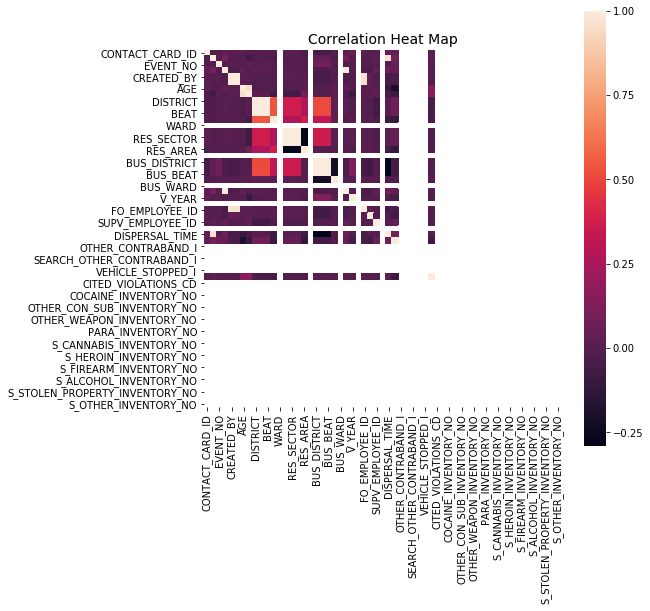

In [8]:
corrmat = df_copy.corr()
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, square=True)
plt.title("Correlation Heat Map", fontsize=14)
plt.show()

In [ ]:
for col in df_copy.columns: 
    print(col) 

In [9]:
df_copy = df_copy.drop(["OTHER_INVENTORY_NO","S_OTHER_INVENTORY_NO"], axis = 1)
df_copy.head()

,CONTACT_CARD_ID,CONTACT_TYPE_CD,CARD_NO,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,CLOTHING_DESCR,NAME_VERIFIED_I,RD_NO,HOTSPOT_NO,EVENT_NO,MISSION_NO,CPD_UNIT_NO,CREATED_BY,CREATED_DATE,MODIFIED_BY,MODIFIED_DATE,AGE,AGE_TO,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_NO,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD,ZIP_CD,DISTRICT,SECTOR,BEAT,AREA,WARD,RES_DISTRICT,RES_SECTOR,RES_BEAT,RES_AREA,RES_WARD,BUS_DISTRICT,BUS_SECTOR,BUS_BEAT,BUS_AREA,BUS_WARD,SUBMITTING_UNIT,CONTACT_TYPE_DESCR,V_YEAR,MAKE_CD,MAKE_DESCR,STYLE_CD,STYLE_DESCR,TYPE_CD,MODEL_DESCR,COLOR_TOP,COLOR_BOTTOM,FO_EMPLOYEE_ID,SO_EMPLOYEE_ID,SUPV_EMPLOYEE_ID,GANG,KNOWN_HANGOUT,FACTION_NAME,CONTACT_CARD_STATUS_CD,COMPLETION_I,LOCATION_CD,HANDCUFFED_I,VEHICLE_INVOLVED_I,DISPERSAL_TIME,NUMBER_OF_PERSONS_DISPERSED,GANG_LOOKOUT_I,GANG_SECURITY_I,INTIMIDATION_I,SUSPECT_NARCOTIC_ACTIVITY_I,ENFORCEMENT_ACTION_TAKEN_I,INDICATIVE_DRUG_TRANSACTION_I,INDICATIVE_CASING_I,FITS_DESCRIPTION_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,GANG_NARCOTIC_RELATED_I,OTHER_FACTOR_I,PAT_DOWN_I,PAT_DOWN_CONSENT_I,PAT_DOWN_RECEIPT_GIVEN_I,VERBAL_THREATS_I,KNOWLEDGE_OF_PRIOR_I,ACTIONS_INDICATIVE_VIOLENCE_I,VIOLENT_CRIME_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,WEAPON_OR_CONTRABAND_FOUND_I,FIREARM_I,COCAINE_I,COCAINE_AMOUNT,HEROIN_I,HEROIN_AMOUNT,OTHER_CONTRABAND_I,OTHER_CONTRABAND_DESCR,OTHER_WEAPON_I,OTHER_WEAPON_DESCR,CANNABIS_I,CANNABIS_AMOUNT,OTHER_CON_SUB_I,OTHER_CON_SUB,OTHER_CON_SUB_AMT,SEARCH_I,SEARCH_CONSENT_I,SEARCH_CONTRABAND_FOUND_I,SEARCH_FIREARM_I,SEARCH_COCAINE_I,SEARCH_COCAINE_AMOUNT,SEARCH_HEROIN_I,SEARCH_HEROIN_AMOUNT,SEARCH_OTHER_CONTRABAND_I,SEARCH_OTHER_CONTRABAND_DESCR,SEARCH_OTHER_WEAPON_I,SEARCH_OTHER_WEAPON_DESCR,SEARCH_CANNABIS_I,SEARCH_CANNABIS_AMOUNT,SEARCH_OTHER_CON_SUB_I,SEARCH_OTHER_CON_SUB_DESCR,SEARCH_OTHER_CON_SUB_AMT,EVENT_ASSIGNEED_BY_CD,BODY_CAMERA_I,CAR_CAMERA_I,VEHICLE_STOPPED_I,INFORMATION_REFUSED_I,FACIAL_HAIR_CD,GANG_OTHER_I,ENFORCEMENT_TYPE_CD,ENFORCEMENT_ID_NO,CITED_VIOLATIONS_CD,CANNABIS_INVENTORY_NO,COCAINE_INVENTORY_NO,HEROIN_INVENTORY_NO,OTHER_CON_SUB_INVENTORY_NO,FIREARM_INVENTORY_NO,OTHER_WEAPON_INVENTORY_NO,ALCOHOL_I,ALCOHOL_INVENTORY_NO,PARA_I,PARA_INVENTORY_NO,STOLEN_PROPERTY_I,STOLEN_PROPERTY_INVENTORY_NO,SEARCH_PROPERTY_I,S_CANNABIS_INVENTORY_NO,S_COCAINE_INVENTORY_NO,S_HEROIN_INVENTORY_NO,S_OTHER_CON_SUB_INVENTORY_NO,S_FIREARM_INVENTORY_NO,S_OTHER_WEAPON_INVENTORY_NO,S_ALCOHOL_I,S_ALCOHOL_INVENTORY_NO,S_PARA_I,S_PARA_INVENTORY_NO,S_STOLEN_PROPERTY_I,S_STOLEN_PROPERTY_INVENTORY_NO,GANG_OTHER,OTHER_DESCR,S_OTHER_I,S_OTHER_DESCR,NAME
0,20410357,INVSTG,ISR000410357,01-JAN-2018 00:08,0,2523,N,"BROWN JACKET, JEANS",NaN,JB100012,NaN,121,NaN,25,185285,01-JAN-2018 01:46,185285.0,01-JAN-2018 01:47,30.0,NaN,M,WWH,506,165,MED,BRO,BLK,SHORT,MED,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,25,252,2523,3,NaN,16.0,163.0,1634.0,3,NaN,NaN,NaN,NaN,0,NaN,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185285,845723.0,184324.0,UNKNOWN,NaN,NaN,APP,Y,303,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,NaN,17,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN
1,20410350,INVSTG,ISR000410350,01-JAN-2018 00:08,0,2523,N,BLUE JEANS AND A BLACK SWEATER,NaN,JB100012,NaN,121,NaN,25,675642,01-JAN-2018 01:35,675642.0,01-JAN-2018 01:38,20.0,NaN,M,WWH,510,175,MED,BRO,BLK,MED,LBR,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,25,252,2523,3,NaN,25.0,252.0,2523.0,3,NaN,NaN,NaN,NaN,0,NaN,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675642,845723.0,184324.0,NaN,NaN,NaN,APP,Y,289,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
df_copy['GANG_OTHER'].unique()
# remove things like "refused info" and "none stated"
# change this to binary

In [ ]:
df_copy['CREATED_BY'].nunique()


In [ ]:
df_copy['FO_EMPLOYEE_ID'].nunique()

In [10]:
df_copy = df_copy.drop(["S_CANNABIS_INVENTORY_NO","S_COCAINE_INVENTORY_NO","S_HEROIN_INVENTORY_NO", "S_FIREARM_INVENTORY_NO","S_ALCOHOL_INVENTORY_NO"], axis = 1)

,CONTACT_CARD_ID,CONTACT_TYPE_CD,CARD_NO,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,CLOTHING_DESCR,NAME_VERIFIED_I,RD_NO,HOTSPOT_NO,EVENT_NO,MISSION_NO,CPD_UNIT_NO,CREATED_BY,CREATED_DATE,MODIFIED_BY,MODIFIED_DATE,AGE,AGE_TO,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_NO,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD,ZIP_CD,DISTRICT,SECTOR,BEAT,AREA,WARD,RES_DISTRICT,RES_SECTOR,RES_BEAT,RES_AREA,RES_WARD,BUS_DISTRICT,BUS_SECTOR,BUS_BEAT,BUS_AREA,BUS_WARD,SUBMITTING_UNIT,CONTACT_TYPE_DESCR,V_YEAR,MAKE_CD,MAKE_DESCR,STYLE_CD,STYLE_DESCR,TYPE_CD,MODEL_DESCR,COLOR_TOP,COLOR_BOTTOM,FO_EMPLOYEE_ID,SO_EMPLOYEE_ID,SUPV_EMPLOYEE_ID,GANG,KNOWN_HANGOUT,FACTION_NAME,CONTACT_CARD_STATUS_CD,COMPLETION_I,LOCATION_CD,HANDCUFFED_I,VEHICLE_INVOLVED_I,DISPERSAL_TIME,NUMBER_OF_PERSONS_DISPERSED,GANG_LOOKOUT_I,GANG_SECURITY_I,INTIMIDATION_I,SUSPECT_NARCOTIC_ACTIVITY_I,ENFORCEMENT_ACTION_TAKEN_I,INDICATIVE_DRUG_TRANSACTION_I,INDICATIVE_CASING_I,FITS_DESCRIPTION_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,GANG_NARCOTIC_RELATED_I,OTHER_FACTOR_I,PAT_DOWN_I,PAT_DOWN_CONSENT_I,PAT_DOWN_RECEIPT_GIVEN_I,VERBAL_THREATS_I,KNOWLEDGE_OF_PRIOR_I,ACTIONS_INDICATIVE_VIOLENCE_I,VIOLENT_CRIME_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,WEAPON_OR_CONTRABAND_FOUND_I,FIREARM_I,COCAINE_I,COCAINE_AMOUNT,HEROIN_I,HEROIN_AMOUNT,OTHER_CONTRABAND_I,OTHER_CONTRABAND_DESCR,OTHER_WEAPON_I,OTHER_WEAPON_DESCR,CANNABIS_I,CANNABIS_AMOUNT,OTHER_CON_SUB_I,OTHER_CON_SUB,OTHER_CON_SUB_AMT,SEARCH_I,SEARCH_CONSENT_I,SEARCH_CONTRABAND_FOUND_I,SEARCH_FIREARM_I,SEARCH_COCAINE_I,SEARCH_COCAINE_AMOUNT,SEARCH_HEROIN_I,SEARCH_HEROIN_AMOUNT,SEARCH_OTHER_CONTRABAND_I,SEARCH_OTHER_CONTRABAND_DESCR,SEARCH_OTHER_WEAPON_I,SEARCH_OTHER_WEAPON_DESCR,SEARCH_CANNABIS_I,SEARCH_CANNABIS_AMOUNT,SEARCH_OTHER_CON_SUB_I,SEARCH_OTHER_CON_SUB_DESCR,SEARCH_OTHER_CON_SUB_AMT,EVENT_ASSIGNEED_BY_CD,BODY_CAMERA_I,CAR_CAMERA_I,VEHICLE_STOPPED_I,INFORMATION_REFUSED_I,FACIAL_HAIR_CD,GANG_OTHER_I,ENFORCEMENT_TYPE_CD,ENFORCEMENT_ID_NO,CITED_VIOLATIONS_CD,CANNABIS_INVENTORY_NO,COCAINE_INVENTORY_NO,HEROIN_INVENTORY_NO,OTHER_CON_SUB_INVENTORY_NO,FIREARM_INVENTORY_NO,OTHER_WEAPON_INVENTORY_NO,ALCOHOL_I,ALCOHOL_INVENTORY_NO,PARA_I,PARA_INVENTORY_NO,STOLEN_PROPERTY_I,STOLEN_PROPERTY_INVENTORY_NO,SEARCH_PROPERTY_I,S_OTHER_CON_SUB_INVENTORY_NO,S_OTHER_WEAPON_INVENTORY_NO,S_ALCOHOL_I,S_PARA_I,S_PARA_INVENTORY_NO,S_STOLEN_PROPERTY_I,S_STOLEN_PROPERTY_INVENTORY_NO,GANG_OTHER,OTHER_DESCR,S_OTHER_I,S_OTHER_DESCR,NAME
0,20410357,INVSTG,ISR000410357,01-JAN-2018 00:08,0,2523,N,"BROWN JACKET, JEANS",NaN,JB100012,NaN,121,NaN,25,185285,01-JAN-2018 01:46,185285.0,01-JAN-2018 01:47,30.0,NaN,M,WWH,506,165,MED,BRO,BLK,SHORT,MED,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,25,252,2523,3,NaN,16.0,163.0,1634.0,3,NaN,NaN,NaN,NaN,0,NaN,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185285,845723.0,184324.0,UNKNOWN,NaN,NaN,APP,Y,303,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,NaN,17,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN
1,20410350,INVSTG,ISR000410350,01-JAN-2018 00:08,0,2523,N,BLUE JEANS AND A BLACK SWEATER,NaN,JB100012,NaN,121,NaN,25,675642,01-JAN-2018 01:35,675642.0,01-JAN-2018 01:38,20.0,NaN,M,WWH,510,175,MED,BRO,BLK,MED,LBR,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,25,252,2523,3,NaN,25.0,252.0,2523.0,3,NaN,NaN,NaN,NaN,0,NaN,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675642,845723.0,184324.0,NaN,NaN,NaN,APP,Y,289,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN

In [11]:
df_copy = df_copy.drop(["S_STOLEN_PROPERTY_INVENTORY_NO","S_PARA_INVENTORY_NO"], axis = 1)

,CONTACT_CARD_ID,CONTACT_TYPE_CD,CARD_NO,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,CLOTHING_DESCR,NAME_VERIFIED_I,RD_NO,HOTSPOT_NO,EVENT_NO,MISSION_NO,CPD_UNIT_NO,CREATED_BY,CREATED_DATE,MODIFIED_BY,MODIFIED_DATE,AGE,AGE_TO,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_NO,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD,ZIP_CD,DISTRICT,SECTOR,BEAT,AREA,WARD,RES_DISTRICT,RES_SECTOR,RES_BEAT,RES_AREA,RES_WARD,BUS_DISTRICT,BUS_SECTOR,BUS_BEAT,BUS_AREA,BUS_WARD,SUBMITTING_UNIT,CONTACT_TYPE_DESCR,V_YEAR,MAKE_CD,MAKE_DESCR,STYLE_CD,STYLE_DESCR,TYPE_CD,MODEL_DESCR,COLOR_TOP,COLOR_BOTTOM,FO_EMPLOYEE_ID,SO_EMPLOYEE_ID,SUPV_EMPLOYEE_ID,GANG,KNOWN_HANGOUT,FACTION_NAME,CONTACT_CARD_STATUS_CD,COMPLETION_I,LOCATION_CD,HANDCUFFED_I,VEHICLE_INVOLVED_I,DISPERSAL_TIME,NUMBER_OF_PERSONS_DISPERSED,GANG_LOOKOUT_I,GANG_SECURITY_I,INTIMIDATION_I,SUSPECT_NARCOTIC_ACTIVITY_I,ENFORCEMENT_ACTION_TAKEN_I,INDICATIVE_DRUG_TRANSACTION_I,INDICATIVE_CASING_I,FITS_DESCRIPTION_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,GANG_NARCOTIC_RELATED_I,OTHER_FACTOR_I,PAT_DOWN_I,PAT_DOWN_CONSENT_I,PAT_DOWN_RECEIPT_GIVEN_I,VERBAL_THREATS_I,KNOWLEDGE_OF_PRIOR_I,ACTIONS_INDICATIVE_VIOLENCE_I,VIOLENT_CRIME_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,WEAPON_OR_CONTRABAND_FOUND_I,FIREARM_I,COCAINE_I,COCAINE_AMOUNT,HEROIN_I,HEROIN_AMOUNT,OTHER_CONTRABAND_I,OTHER_CONTRABAND_DESCR,OTHER_WEAPON_I,OTHER_WEAPON_DESCR,CANNABIS_I,CANNABIS_AMOUNT,OTHER_CON_SUB_I,OTHER_CON_SUB,OTHER_CON_SUB_AMT,SEARCH_I,SEARCH_CONSENT_I,SEARCH_CONTRABAND_FOUND_I,SEARCH_FIREARM_I,SEARCH_COCAINE_I,SEARCH_COCAINE_AMOUNT,SEARCH_HEROIN_I,SEARCH_HEROIN_AMOUNT,SEARCH_OTHER_CONTRABAND_I,SEARCH_OTHER_CONTRABAND_DESCR,SEARCH_OTHER_WEAPON_I,SEARCH_OTHER_WEAPON_DESCR,SEARCH_CANNABIS_I,SEARCH_CANNABIS_AMOUNT,SEARCH_OTHER_CON_SUB_I,SEARCH_OTHER_CON_SUB_DESCR,SEARCH_OTHER_CON_SUB_AMT,EVENT_ASSIGNEED_BY_CD,BODY_CAMERA_I,CAR_CAMERA_I,VEHICLE_STOPPED_I,INFORMATION_REFUSED_I,FACIAL_HAIR_CD,GANG_OTHER_I,ENFORCEMENT_TYPE_CD,ENFORCEMENT_ID_NO,CITED_VIOLATIONS_CD,CANNABIS_INVENTORY_NO,COCAINE_INVENTORY_NO,HEROIN_INVENTORY_NO,OTHER_CON_SUB_INVENTORY_NO,FIREARM_INVENTORY_NO,OTHER_WEAPON_INVENTORY_NO,ALCOHOL_I,ALCOHOL_INVENTORY_NO,PARA_I,PARA_INVENTORY_NO,STOLEN_PROPERTY_I,STOLEN_PROPERTY_INVENTORY_NO,SEARCH_PROPERTY_I,S_OTHER_CON_SUB_INVENTORY_NO,S_OTHER_WEAPON_INVENTORY_NO,S_ALCOHOL_I,S_PARA_I,S_STOLEN_PROPERTY_I,GANG_OTHER,OTHER_DESCR,S_OTHER_I,S_OTHER_DESCR,NAME
0,20410357,INVSTG,ISR000410357,01-JAN-2018 00:08,0,2523,N,"BROWN JACKET, JEANS",NaN,JB100012,NaN,121,NaN,25,185285,01-JAN-2018 01:46,185285.0,01-JAN-2018 01:47,30.0,NaN,M,WWH,506,165,MED,BRO,BLK,SHORT,MED,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,25,252,2523,3,NaN,16.0,163.0,1634.0,3,NaN,NaN,NaN,NaN,0,NaN,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185285,845723.0,184324.0,UNKNOWN,NaN,NaN,APP,Y,303,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,NaN,17,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN
1,20410350,INVSTG,ISR000410350,01-JAN-2018 00:08,0,2523,N,BLUE JEANS AND A BLACK SWEATER,NaN,JB100012,NaN,121,NaN,25,675642,01-JAN-2018 01:35,675642.0,01-JAN-2018 01:38,20.0,NaN,M,WWH,510,175,MED,BRO,BLK,MED,LBR,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,25,252,2523,3,NaN,25.0,252.0,2523.0,3,NaN,NaN,NaN,NaN,0,NaN,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675642,845723.0,184324.0,NaN,NaN,NaN,APP,Y,289,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,

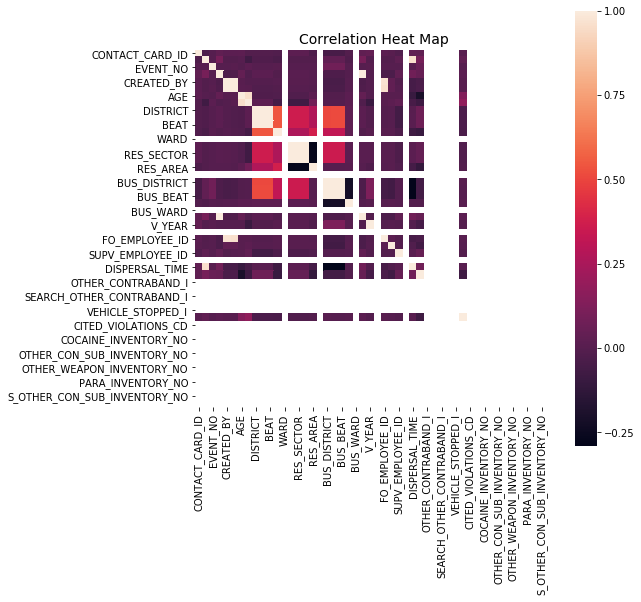

In [12]:
corrmat = df_copy.corr()
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, square=True)
plt.title("Correlation Heat Map", fontsize=14)
plt.show()

In [13]:
df_copy = df_copy.drop(["WARD","OTHER_CONTRABAND_I","SEARCH_OTHER_CONTRABAND_I","CITED_VIOLATIONS_CD","COCAINE_INVENTORY_NO","OTHER_CON_SUB_INVENTORY_NO","OTHER_WEAPON_INVENTORY_NO","PARA_INVENTORY_NO","S_OTHER_CON_SUB_INVENTORY_NO"], axis = 1)

In [14]:
df_copy = df_copy.drop(["RES_WARD", "TYPE_CD", "BUS_WARD", "S_OTHER_WEAPON_INVENTORY_NO","STOLEN_PROPERTY_INVENTORY_NO","FIREARM_INVENTORY_NO","ALCOHOL_INVENTORY_NO","CANNABIS_INVENTORY_NO","HEROIN_INVENTORY_NO"], axis = 1)

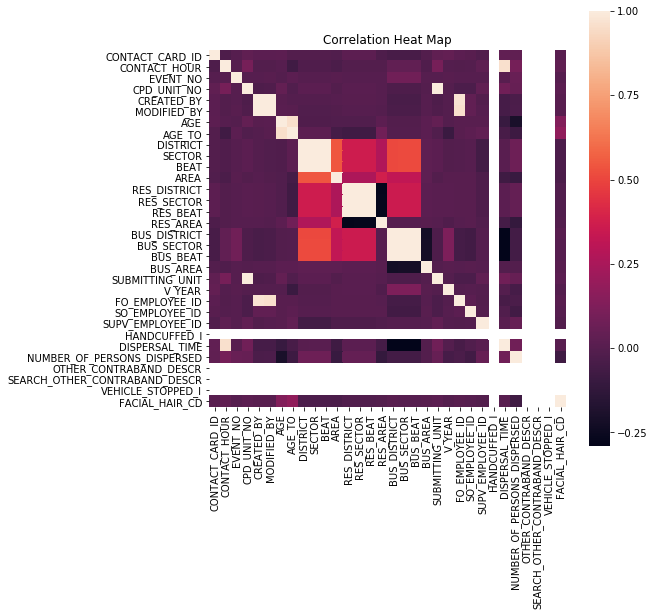

In [15]:
corrmat = df_copy.corr()
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, square=True)
plt.title("Correlation Heat Map", fontsize=12)
plt.show()

In [16]:
df_copy = df_copy.drop(["HANDCUFFED_I","OTHER_CONTRABAND_DESCR","SEARCH_OTHER_CONTRABAND_DESCR","VEHICLE_STOPPED_I" ], axis = 1)

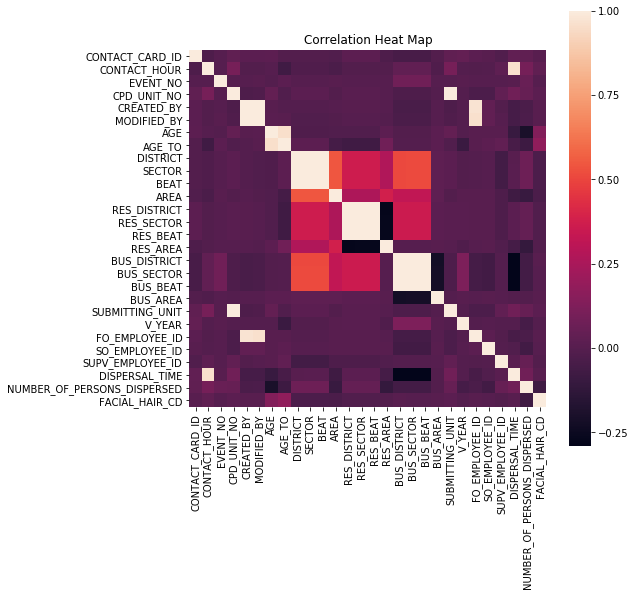

In [17]:
corrmat = df_copy.corr()
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, square=True)
plt.title("Correlation Heat Map", fontsize=12)
plt.show()

In [ ]:
# great, we've removed the numerical columns that are missing data
# next, let's tackle the object columns

In [18]:
df_copy.head()

,CONTACT_CARD_ID,CONTACT_TYPE_CD,CARD_NO,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,CLOTHING_DESCR,NAME_VERIFIED_I,RD_NO,HOTSPOT_NO,EVENT_NO,MISSION_NO,CPD_UNIT_NO,CREATED_BY,CREATED_DATE,MODIFIED_BY,MODIFIED_DATE,AGE,AGE_TO,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_NO,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD,ZIP_CD,DISTRICT,SECTOR,BEAT,AREA,RES_DISTRICT,RES_SECTOR,RES_BEAT,RES_AREA,BUS_DISTRICT,BUS_SECTOR,BUS_BEAT,BUS_AREA,SUBMITTING_UNIT,CONTACT_TYPE_DESCR,V_YEAR,MAKE_CD,MAKE_DESCR,STYLE_CD,STYLE_DESCR,MODEL_DESCR,COLOR_TOP,COLOR_BOTTOM,FO_EMPLOYEE_ID,SO_EMPLOYEE_ID,SUPV_EMPLOYEE_ID,GANG,KNOWN_HANGOUT,FACTION_NAME,CONTACT_CARD_STATUS_CD,COMPLETION_I,LOCATION_CD,VEHICLE_INVOLVED_I,DISPERSAL_TIME,NUMBER_OF_PERSONS_DISPERSED,GANG_LOOKOUT_I,GANG_SECURITY_I,INTIMIDATION_I,SUSPECT_NARCOTIC_ACTIVITY_I,ENFORCEMENT_ACTION_TAKEN_I,INDICATIVE_DRUG_TRANSACTION_I,INDICATIVE_CASING_I,FITS_DESCRIPTION_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,GANG_NARCOTIC_RELATED_I,OTHER_FACTOR_I,PAT_DOWN_I,PAT_DOWN_CONSENT_I,PAT_DOWN_RECEIPT_GIVEN_I,VERBAL_THREATS_I,KNOWLEDGE_OF_PRIOR_I,ACTIONS_INDICATIVE_VIOLENCE_I,VIOLENT_CRIME_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,WEAPON_OR_CONTRABAND_FOUND_I,FIREARM_I,COCAINE_I,COCAINE_AMOUNT,HEROIN_I,HEROIN_AMOUNT,OTHER_WEAPON_I,OTHER_WEAPON_DESCR,CANNABIS_I,CANNABIS_AMOUNT,OTHER_CON_SUB_I,OTHER_CON_SUB,OTHER_CON_SUB_AMT,SEARCH_I,SEARCH_CONSENT_I,SEARCH_CONTRABAND_FOUND_I,SEARCH_FIREARM_I,SEARCH_COCAINE_I,SEARCH_COCAINE_AMOUNT,SEARCH_HEROIN_I,SEARCH_HEROIN_AMOUNT,SEARCH_OTHER_WEAPON_I,SEARCH_OTHER_WEAPON_DESCR,SEARCH_CANNABIS_I,SEARCH_CANNABIS_AMOUNT,SEARCH_OTHER_CON_SUB_I,SEARCH_OTHER_CON_SUB_DESCR,SEARCH_OTHER_CON_SUB_AMT,EVENT_ASSIGNEED_BY_CD,BODY_CAMERA_I,CAR_CAMERA_I,INFORMATION_REFUSED_I,FACIAL_HAIR_CD,GANG_OTHER_I,ENFORCEMENT_TYPE_CD,ENFORCEMENT_ID_NO,ALCOHOL_I,PARA_I,STOLEN_PROPERTY_I,SEARCH_PROPERTY_I,S_ALCOHOL_I,S_PARA_I,S_STOLEN_PROPERTY_I,GANG_OTHER,OTHER_DESCR,S_OTHER_I,S_OTHER_DESCR,NAME
0,20410357,INVSTG,ISR000410357,01-JAN-2018 00:08,0,2523,N,"BROWN JACKET, JEANS",NaN,JB100012,NaN,121,NaN,25,185285,01-JAN-2018 01:46,185285.0,01-JAN-2018 01:47,30.0,NaN,M,WWH,506,165,MED,BRO,BLK,SHORT,MED,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,25,252,2523,3,16.0,163.0,1634.0,3,NaN,NaN,NaN,0,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185285,845723.0,184324.0,UNKNOWN,NaN,NaN,APP,Y,303,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,17,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN
1,20410350,INVSTG,ISR000410350,01-JAN-2018 00:08,0,2523,N,BLUE JEANS AND A BLACK SWEATER,NaN,JB100012,NaN,121,NaN,25,675642,01-JAN-2018 01:35,675642.0,01-JAN-2018 01:38,20.0,NaN,M,WWH,510,175,MED,BRO,BLK,MED,LBR,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,25,252,2523,3,25.0,252.0,2523.0,3,NaN,NaN,NaN,0,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675642,845723.0,184324.0,NaN,NaN,NaN,APP,Y,289,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20410351,INVSTG,ISR000410351,01-JAN-2018 00:08,0,2523,N,"GRAY HOODED SWEATER, JEANS",NaN,JB100012,NaN,121,NaN,25,185285,01-JAN-2018 01:35,185285.0,01-JAN-2018 01:36,23.0,NaN,M,WWH,508,170,MED,BRO,BAL,SHORT,MED,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,25,252,2523,3,25.0,253.0,2535.0,3,NaN,NaN,NaN,0,25,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185285,845723.0,184324.0,UNKNOWN,NaN,NaN,APP,Y,303,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [45]:
df_copy = df_copy.drop(["FACIAL_HAIR_CD", "COMPLETION_I"], axis = 1)

In [49]:
df_copy.select_dtypes(include='object')

#we're looking only at object columns here

# NOTES
# group by MISSION_NO to figure out what to do with that    

,CONTACT_TYPE_CD,CARD_NO,CONTACT_DATE,SUBMITTING_BEAT_CD,JUVENILE_I,CLOTHING_DESCR,NAME_VERIFIED_I,RD_NO,HOTSPOT_NO,MISSION_NO,CREATED_DATE,MODIFIED_DATE,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_NO,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD,ZIP_CD,CONTACT_TYPE_DESCR,MAKE_CD,MAKE_DESCR,STYLE_CD,STYLE_DESCR,MODEL_DESCR,COLOR_TOP,COLOR_BOTTOM,GANG,KNOWN_HANGOUT,FACTION_NAME,CONTACT_CARD_STATUS_CD,LOCATION_CD,VEHICLE_INVOLVED_I,GANG_LOOKOUT_I,GANG_SECURITY_I,INTIMIDATION_I,SUSPECT_NARCOTIC_ACTIVITY_I,ENFORCEMENT_ACTION_TAKEN_I,INDICATIVE_DRUG_TRANSACTION_I,INDICATIVE_CASING_I,FITS_DESCRIPTION_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,GANG_NARCOTIC_RELATED_I,OTHER_FACTOR_I,PAT_DOWN_I,PAT_DOWN_CONSENT_I,PAT_DOWN_RECEIPT_GIVEN_I,VERBAL_THREATS_I,KNOWLEDGE_OF_PRIOR_I,ACTIONS_INDICATIVE_VIOLENCE_I,VIOLENT_CRIME_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,WEAPON_OR_CONTRABAND_FOUND_I,FIREARM_I,COCAINE_I,COCAINE_AMOUNT,HEROIN_I,HEROIN_AMOUNT,OTHER_WEAPON_I,OTHER_WEAPON_DESCR,CANNABIS_I,CANNABIS_AMOUNT,OTHER_CON_SUB_I,OTHER_CON_SUB,OTHER_CON_SUB_AMT,SEARCH_I,SEARCH_CONSENT_I,SEARCH_CONTRABAND_FOUND_I,SEARCH_FIREARM_I,SEARCH_COCAINE_I,SEARCH_COCAINE_AMOUNT,SEARCH_HEROIN_I,SEARCH_HEROIN_AMOUNT,SEARCH_OTHER_WEAPON_I,SEARCH_OTHER_WEAPON_DESCR,SEARCH_CANNABIS_I,SEARCH_CANNABIS_AMOUNT,SEARCH_OTHER_CON_SUB_I,SEARCH_OTHER_CON_SUB_DESCR,SEARCH_OTHER_CON_SUB_AMT,EVENT_ASSIGNEED_BY_CD,BODY_CAMERA_I,CAR_CAMERA_I,INFORMATION_REFUSED_I,GANG_OTHER_I,ENFORCEMENT_TYPE_CD,ENFORCEMENT_ID_NO,ALCOHOL_I,PARA_I,STOLEN_PROPERTY_I,SEARCH_PROPERTY_I,S_ALCOHOL_I,S_PARA_I,S_STOLEN_PROPERTY_I,GANG_OTHER,OTHER_DESCR,S_OTHER_I,S_OTHER_DESCR,NAME
0,INVSTG,ISR000410357,01-JAN-2018 00:08,2523,N,"BROWN JACKET, JEANS",NaN,JB100012,NaN,NaN,01-JAN-2018 01:46,01-JAN-2018 01:47,M,WWH,506,165,MED,BRO,BLK,SHORT,MED,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,APP,303,N,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN
1,INVSTG,ISR000410350,01-JAN-2018 00:08,2523,N,BLUE JEANS AND A BLACK SWEATER,NaN,JB100012,NaN,NaN,01-JAN-2018 01:35,01-JAN-2018 01:38,M,WWH,510,175,MED,BRO,BLK,MED,LBR,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APP,289,N,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INVSTG,ISR000410351,01-JAN-2018 00:08,2523,N,"GRAY HOODED SWEATER, JEANS",NaN,JB100012,NaN,NaN,01-JAN-2018 01:35,01-JAN-2018 01:36,M,WWH,508,170,MED,BRO,BAL,SHORT,MED,40XX,W,OAKDALE AVE,CHICAGO,IL,60641,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,APP,303,N,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OEMC,Y,N,NaN,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN
3,INVSTG,ISR000410338,01-JAN-2018 00:10,6738,N,"BLACK LONGSLEEVE SHIRT, GREY JEANS",Y,NaN,NaN,NaN,01-JAN-2018 01:01,NaN,M,WWH,508,220,HEA,BRO,BLK,SHAG,MBR,28XX,N,NATCHEZ AVE,CHICAGO,IL,60634,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DARWIN CITY,APP,092,N,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,Y,Y,NaN,NaN,Y,Y,NaN,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VIEW,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORCHESTRA ALBANY
4,INVSTG,ISR000410352,01-JAN-2018 00:30,0767,N,"WHITE SOX HAT, BLACK JACKET, BLACK JEANS",Y,NaN,NaN,NaN,01-JAN-2018 01:36,01-JAN-20

In [ ]:
# Moving on to EDA

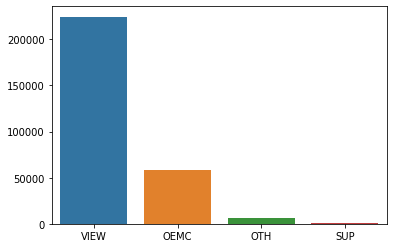

In [52]:
y = df_copy["EVENT_ASSIGNEED_BY_CD"].value_counts()
sns.barplot(y.index, y.values)

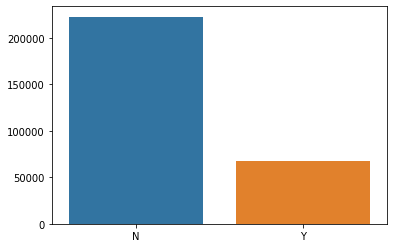

In [53]:
y = df_copy["ENFORCEMENT_ACTION_TAKEN_I"].value_counts()
sns.barplot(y.index, y.values)

# Okay, this is starting to take shape
# Based on the below, about 70k incidents results in an "action"
# The chart below details which "actions" 

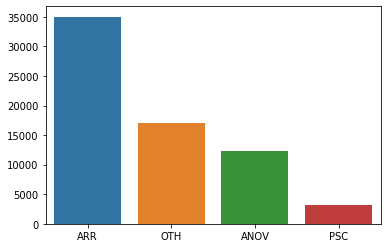

In [51]:
y = df_copy["ENFORCEMENT_TYPE_CD"].value_counts()
sns.barplot(y.index, y.values)

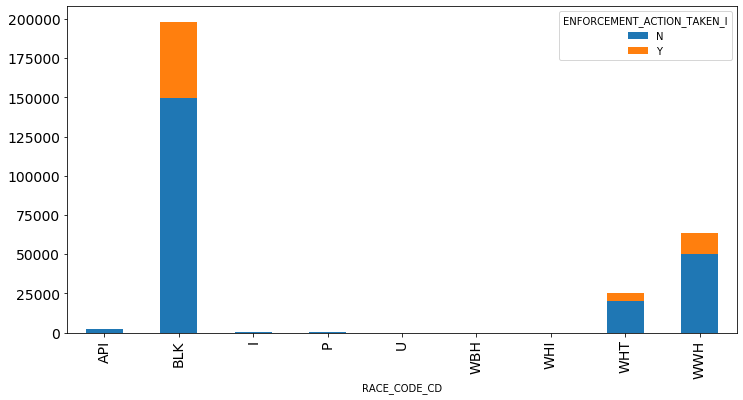

In [58]:
df_copy.groupby(["RACE_CODE_CD","ENFORCEMENT_ACTION_TAKEN_I"]).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6),fontsize=14) 

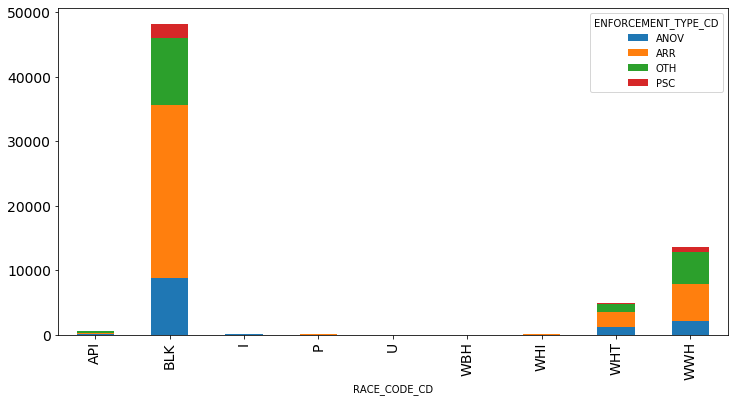

In [59]:
df_copy.groupby(["RACE_CODE_CD","ENFORCEMENT_TYPE_CD"]).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6),fontsize=14) 

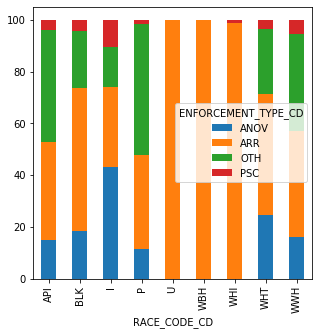

In [62]:
ax = pd.crosstab(df_copy["RACE_CODE_CD"], df_copy["ENFORCEMENT_TYPE_CD"]).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(5,5),stacked=True)

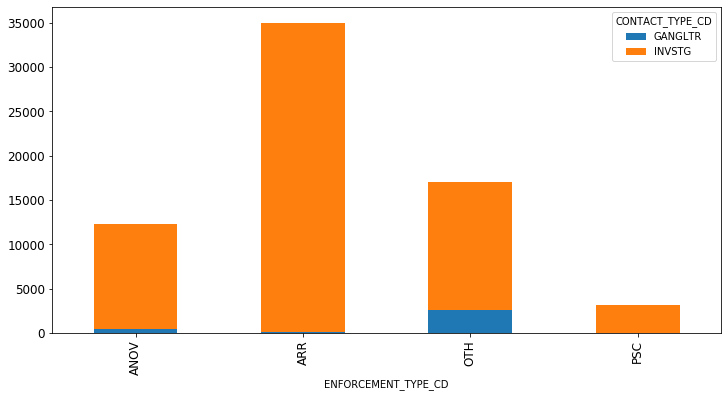

In [69]:
df_copy.groupby(["ENFORCEMENT_TYPE_CD","CONTACT_TYPE_CD"]).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6),fontsize=12) 

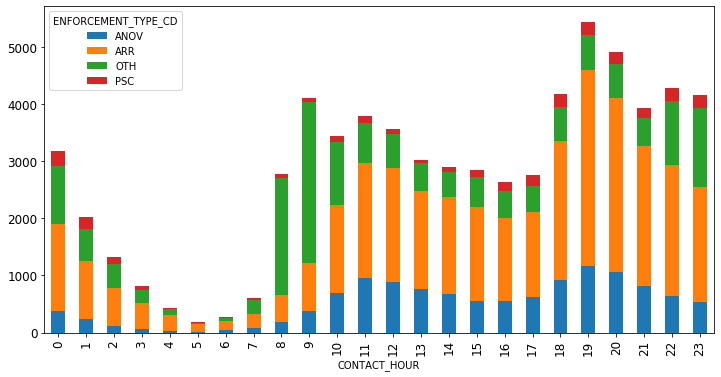

In [73]:
df_copy.groupby(["CONTACT_HOUR","ENFORCEMENT_TYPE_CD"]).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6),fontsize=12)

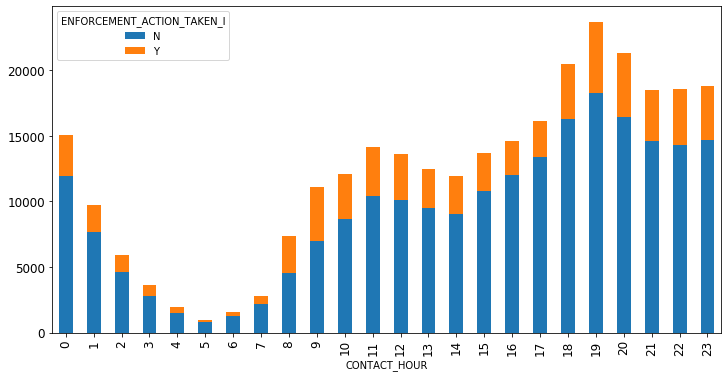

In [74]:
df_copy.groupby(["CONTACT_HOUR","ENFORCEMENT_ACTION_TAKEN_I"]).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6),fontsize=12)

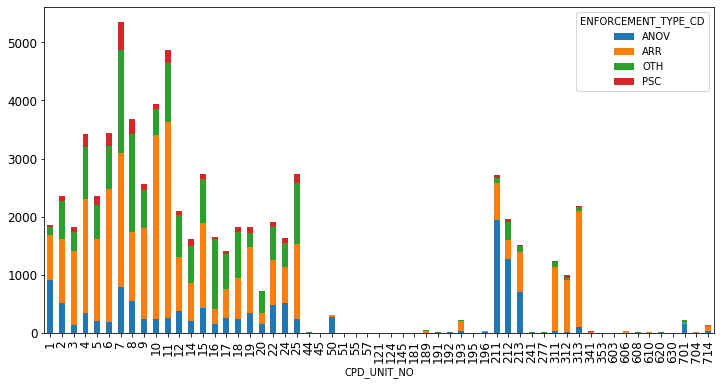

In [76]:
df_copy.groupby(["CPD_UNIT_NO","ENFORCEMENT_TYPE_CD"]).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6),fontsize=12)

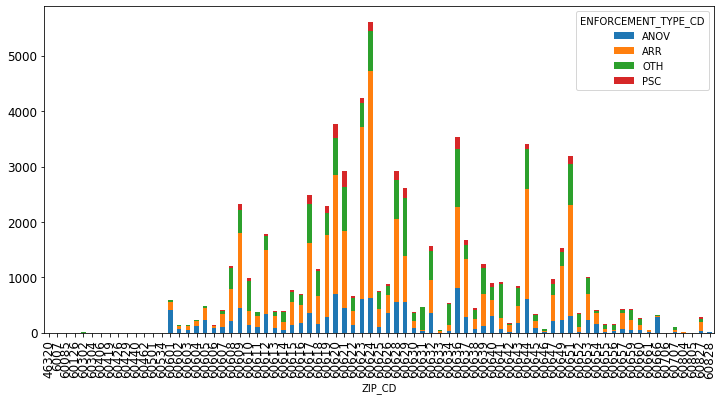

In [77]:
df_copy.groupby(["ZIP_CD","ENFORCEMENT_TYPE_CD"]).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6),fontsize=12)

In [ ]:
# saving our cleaned file to jupyter

In [72]:
df_clean = df_copy
df_clean.to_csv('ISR_data_clean.csv', index=False)